#          Obesity-Prediction-Data-Science

## Problem Description
The problem statement given to us is as follows :
“ Applying ML Classification algorithms on the data set and getting inferences from the data using appropriate ML algorithms. ”

Prediction of levels of obesity by using machine learning classification models.

Data collected from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+). Official publication of the research that provides data can be accessed from [here](https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub).

## Data Set Information:

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.


## Imports

In [1]:
#import packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#read data
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


##### Attributes consisting of

* What is your gender? (Gender) = Female, Male  
* What is your age? (Age) = Numeric value  
* What is your height? (Height) = Numeric value in meters  
* What is your weight? (Weight) = Numeric value in Kilograms  
* Has a family member suffered or suffers from overweight? = Yes, No  
* Do you eat high caloric food frequenlty? (FAVC) = Yes, No  
* Do you usually eat vegatables in your meals? (FCVC) = 1-3 follow by usually meal  
* How many main meals do you have daily? (NCP) = Between 1 y 2, 3, more than 4  
* Do you eat any food between mean? (CAEC) = No, Sometimes, Frequently, Always  
* Do you smoke? (Smoke) = Yes, No  
* How much water do you drink daily? (CH20) = less than a liter, between 1 and 2L, more than 2 L  
* Do you monitor the calories you eat daily? (SCC) = Yes, No  
* How often do you have physical activity? (FAF) = I do not have, 1 or 2 days, 2 or 4 days, 4 or 5 day  
* How much time do you use technological devices? (TUE) = 0-2 hours, 3-5 hours, more than 5 hours  
* How often do you drink alcohol? (CALC) =I don't drink, Sometimes, Frequently, Always  
* Which transportation do you usually use? (MTRANS) = Automobile, Motorbike, Bike Public Transportation, Walking  


## Data Cleaning

In [4]:
df = df.rename(columns={'NObeyesdad': 'result'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
df.shape

(2111, 17)

In [7]:
df.isnull().sum()
# no data cleaning required

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
result                            0
dtype: int64

* The data contains 2111 records with 17 columns
* The data loads as text and float objects for most of the objects. However we know that some are float, categorical and ordinal
* All of the records are unique and contain no null values
* Height and Weight are included however they have a direct correlation to each other and our target variable

## Exploratory Data Analysis

In [8]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.
    
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = sns.cubehelix_palette(), order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

In [9]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.
    
    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

In [10]:
def cross_plot(dataset, lead_category, sup_category, order = None, hue_order= None):
    """
    Function: Plots interaction between two categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """
    
    ax = sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette="Blues_r", hue_order= hue_order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {lead_category} with respect to {sup_category}")
    
    plt.show()

In [11]:
def cmp_plot(dataset, lead_category, sup_category, order = None):
    """
    Function: Plots interaction between numerical and categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """
    
    ax = sns.histplot(data= dataset, x=sup_category, hue=lead_category, palette= "rocket", hue_order= order)
    
    plt.show()

In [12]:
sns.axes_style("darkgrid")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'grid.color': 'white',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

#### Obesity Levels

In [13]:
weight_order=  ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

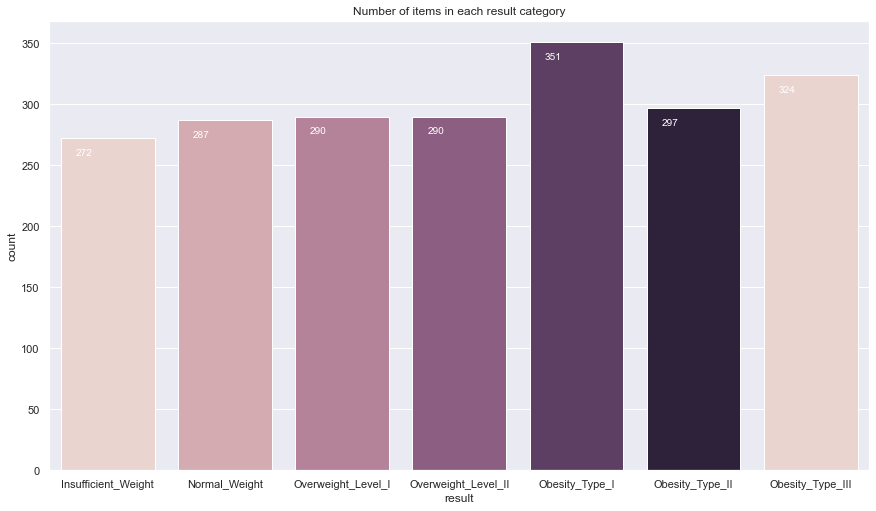

In [14]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
count_values(df, "result", weight_order) 

* 351 instances are belong to "obesity_type_1"; more than 250 instances are belong to "insufficient_weight" class.

* The plot shows the dataset is balanced; only "Obese Type I" class slightly outnumber the other categories.

#### Gender

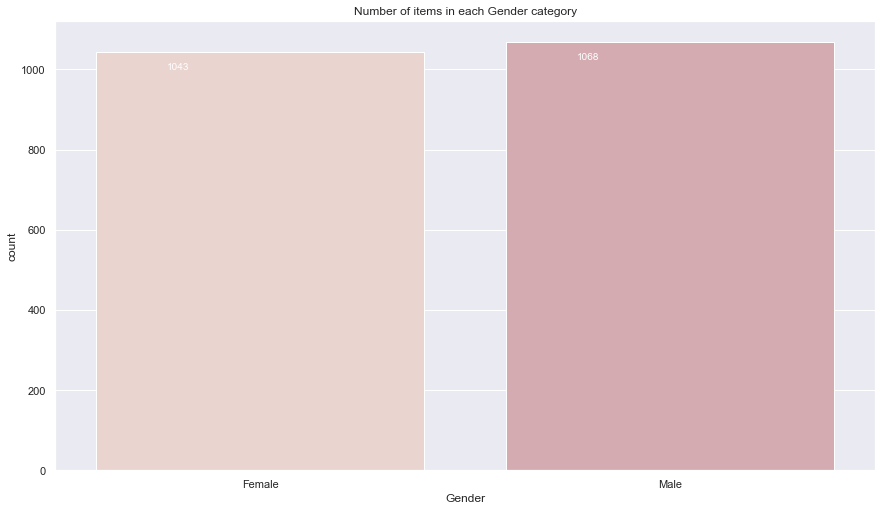

In [15]:
count_values(df, "Gender")

There are almost an equal number of females and males in the dataset. Data is available for slightly more men than women but this does not make it imbalanced.

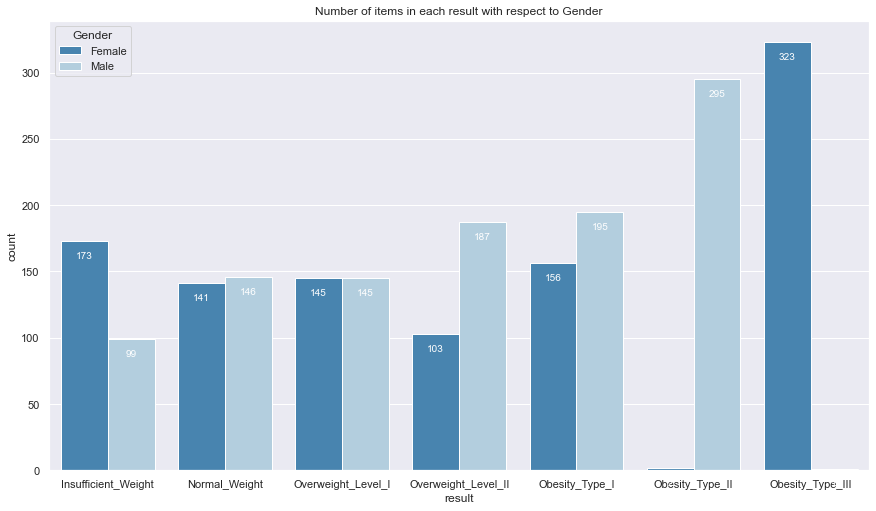

In [16]:
cross_plot(df, "result", "Gender", weight_order)

* Women are more likely to have "Insufficient weight" than men. On the other hand, there are more obese men than women, save in the last, extreme obesity category.
* Females do not have "obesity_type_2". males do not have "obesity_type_3"

#### Age

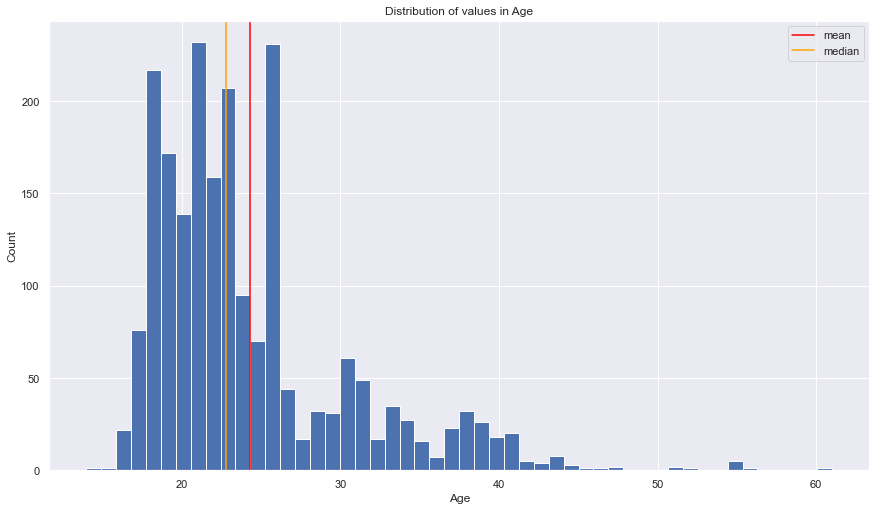

In [17]:
plot_distribution(df, "Age")

In [18]:
df["Age"].describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

* We can see that mostly young people were joined the survey.

* Top 3 ages: 21, 18, 19

#### Height & Weight

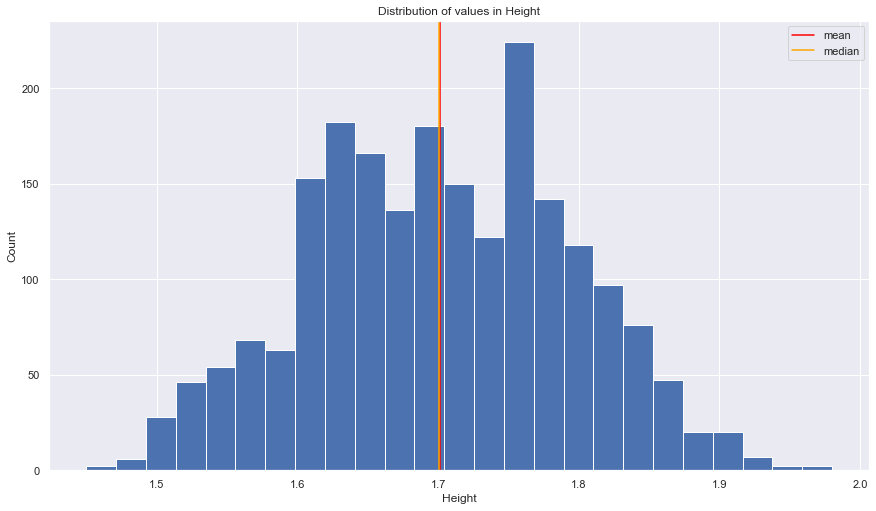

In [19]:
plot_distribution(df, "Height")

* Most people are 1.60 m - 1.85 m tall. Both mean and median values are around 1.70.

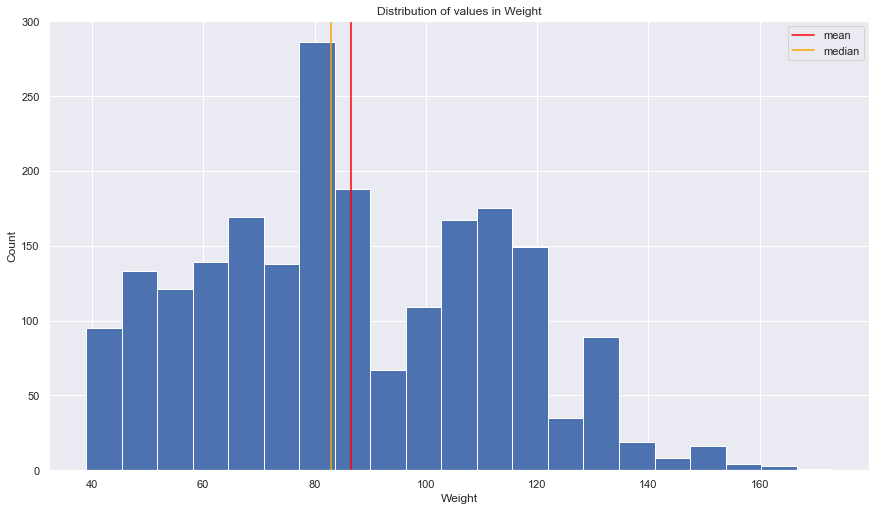

In [20]:
plot_distribution(df, "Weight")

* The mean and the median are shifted to the left because of the larger number of people weighting 80 kg.

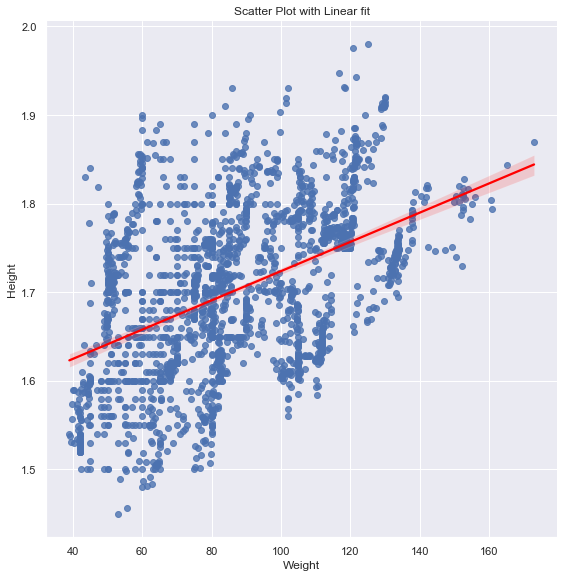

In [21]:
# Obesity is calculated by BMI
# Body Mass Index (BMI) = Weight/(Height)^2
# Correlation Between Height & Weight


sns.lmplot(x='Weight', y='Height', data=df, height= 8, line_kws={'color': 'red'})
plt.title("Scatter Plot with Linear fit");


The red line shows that there is a positive correlation between them, which means an increase in one variable leads to an increase in the other. In other words, taller people are more likely to weight more.

#### Family History

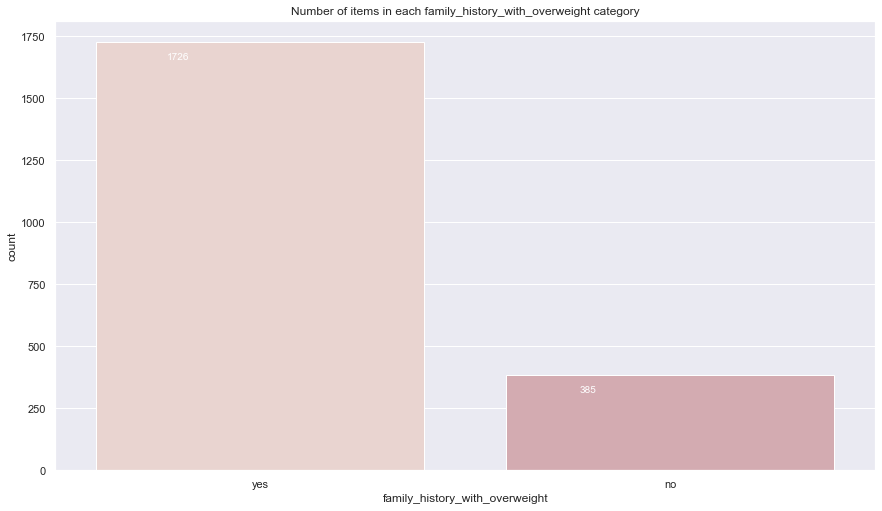

In [22]:
count_values(df, "family_history_with_overweight")

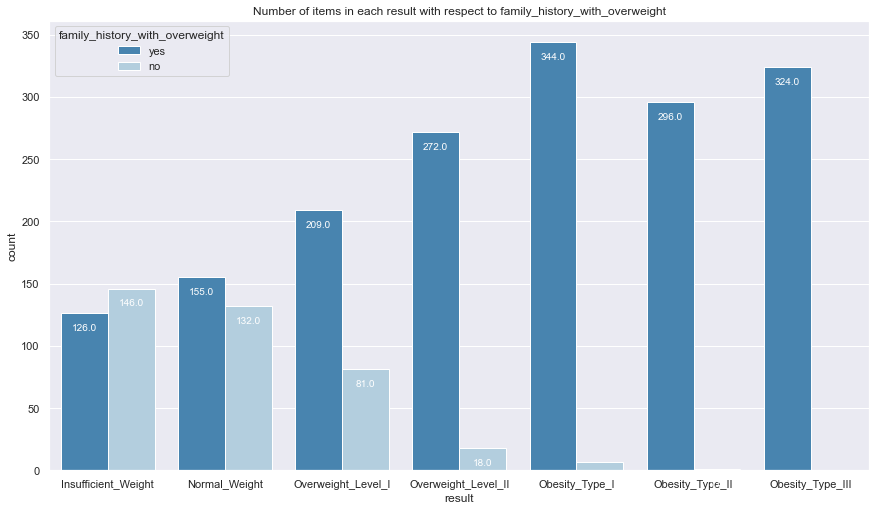

In [23]:
cross_plot(df, "result", "family_history_with_overweight", weight_order)

All those categorised as overweight or obese had family members suffering from weight problems.

#### High caloric food Consumption

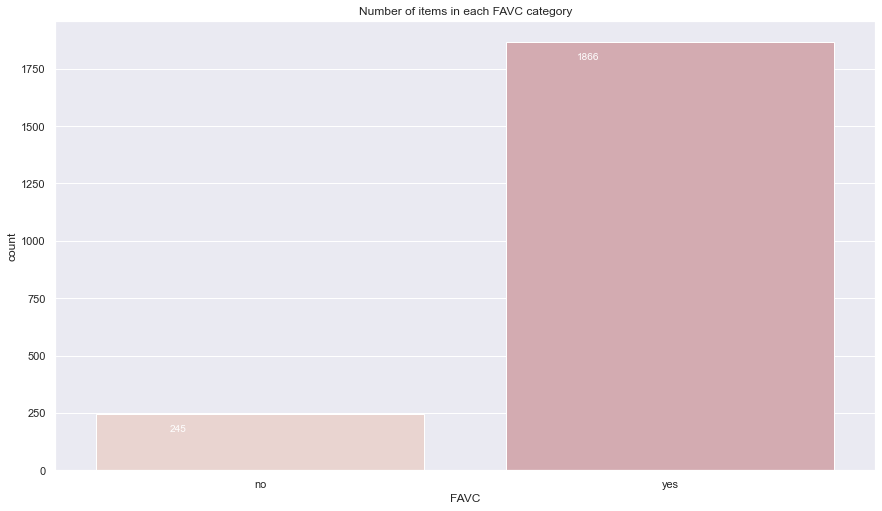

In [24]:
count_values(df, "FAVC")

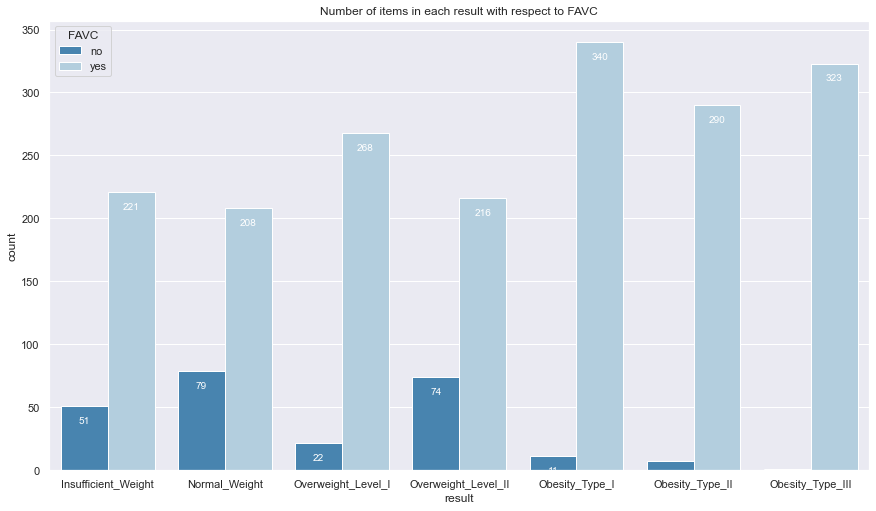

In [25]:
cross_plot(df, "result", "FAVC", weight_order)

#### Consumption of Vegetables

"FCVC" column denotes if people consume vegetables.  
It could be assumed that "3" means "Always", "2" - "Sometimes", and "1" - "Never", but it is not clear what the values inbetween mean.

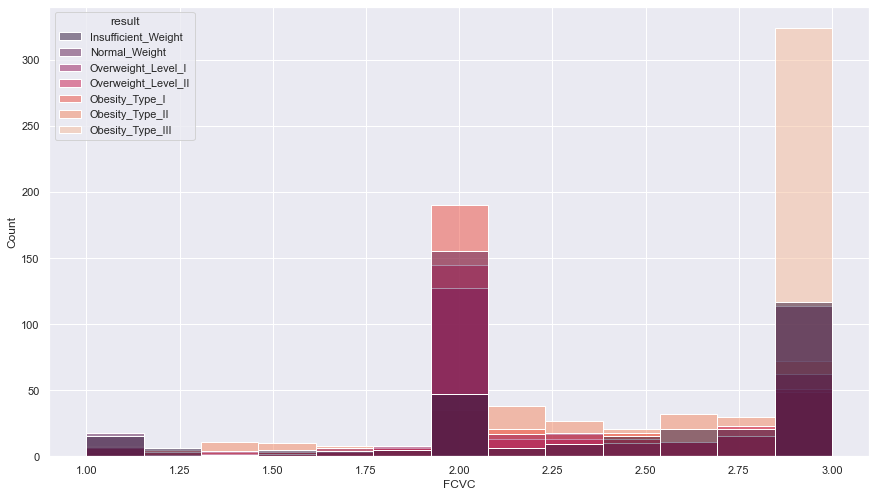

In [26]:
cmp_plot(df, "result", "FCVC", weight_order)

#### Meals per day

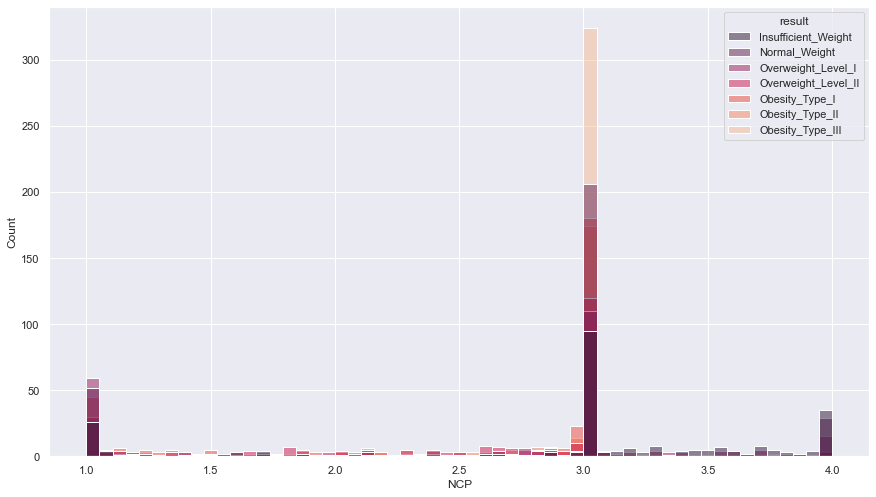

In [27]:
cmp_plot(df, "result", "NCP", weight_order)

In [28]:
df["NCP"].describe()

count    2111.000000
mean        2.685628
std         0.778039
min         1.000000
25%         2.658738
50%         3.000000
75%         3.000000
max         4.000000
Name: NCP, dtype: float64

#### Food between meals

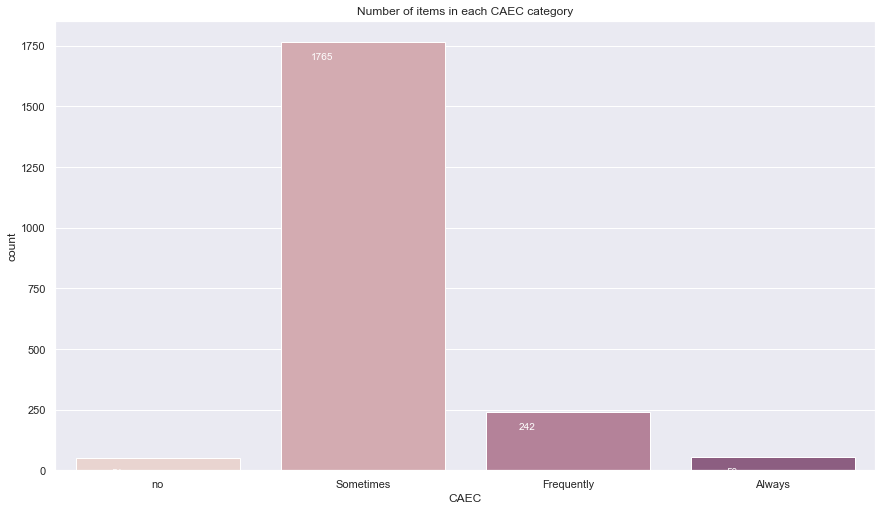

In [29]:
count_values(df, "CAEC", ["no", "Sometimes", "Frequently", "Always"])

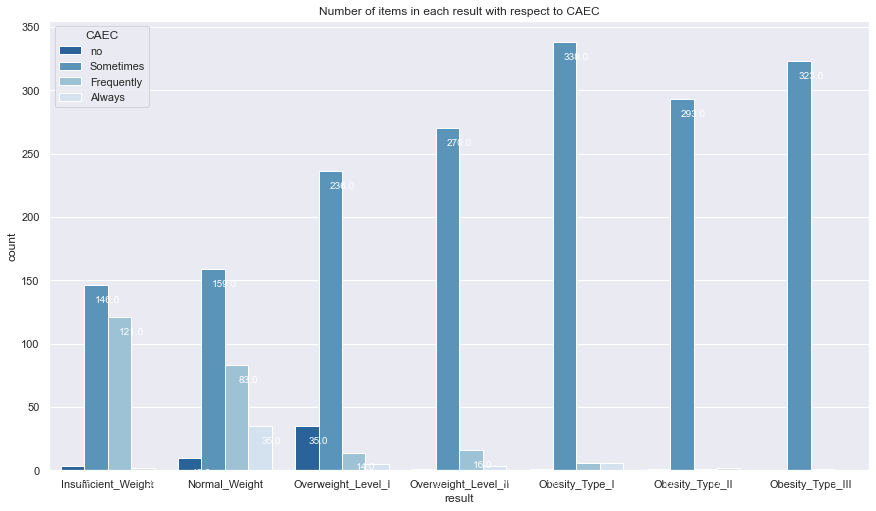

In [30]:
cross_plot(df, "result", "CAEC", weight_order, hue_order= ["no", "Sometimes", "Frequently", "Always"])

#### Smoke

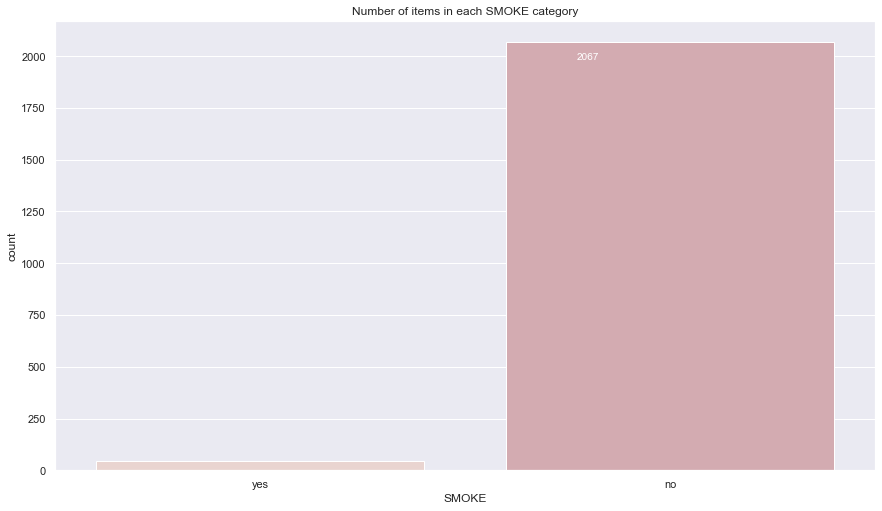

In [31]:

count_values(df,"SMOKE",["yes","no"])

Most of the people in the survey are non-smokers which makes it difficult to find inference about smokers. 

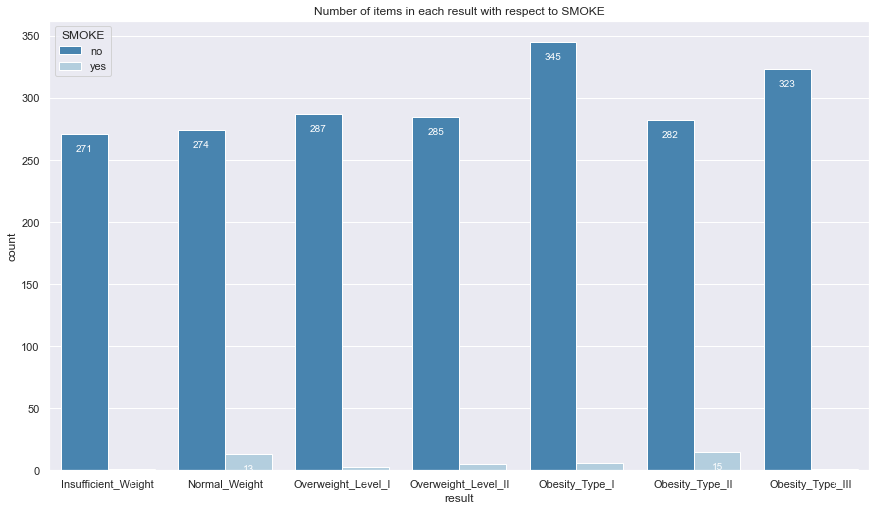

In [32]:
cross_plot(df, "result", "SMOKE", weight_order)

Analysing the plot we understand that non-smoking does not have any effect on obesity or insufficient weight as all the attributes are ranging from 270-345 hence not much deviation 

#### Water Intake

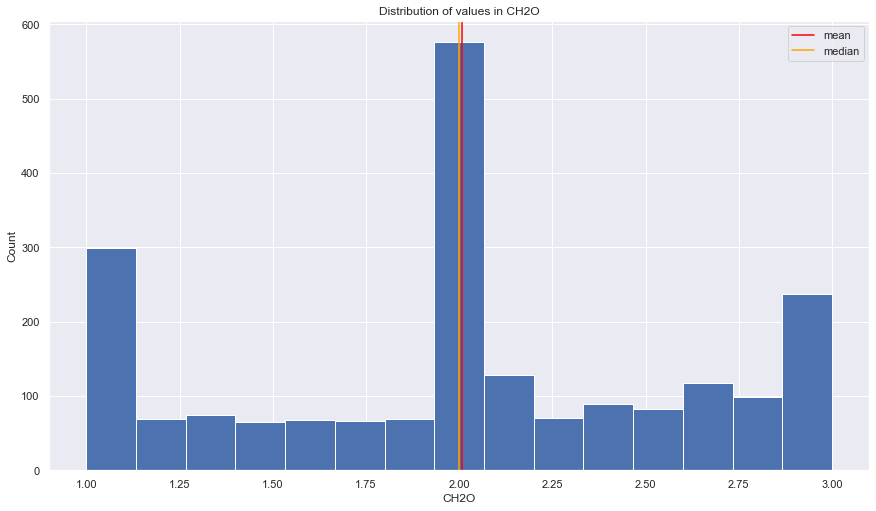

In [33]:
plot_distribution(df,"CH2O")

In [34]:
df["CH2O"].describe()

count    2111.000000
mean        2.008011
std         0.612953
min         1.000000
25%         1.584812
50%         2.000000
75%         2.477420
max         3.000000
Name: CH2O, dtype: float64

According to the distribution and statistics we can infer that most of the people in the survey drink 2 litres of water and there is no one who drinks less than a litre

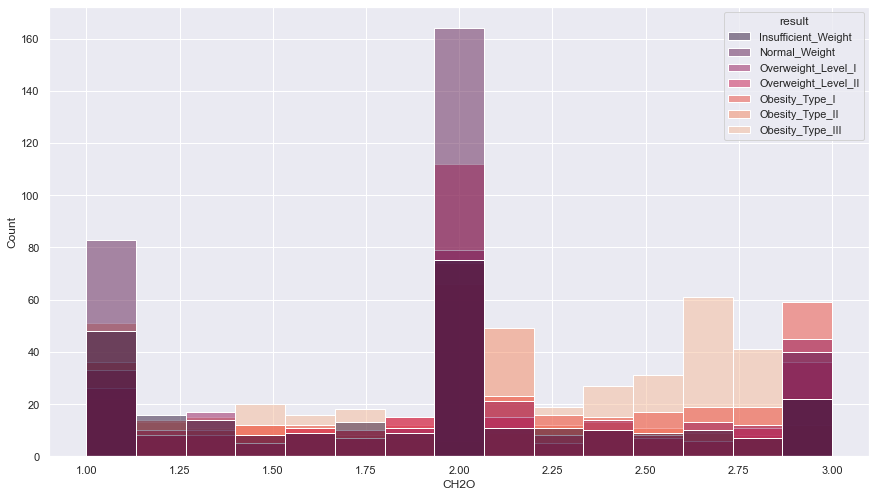

In [35]:
cmp_plot(df, "result", "CH2O", weight_order)

#### Record Calories intake

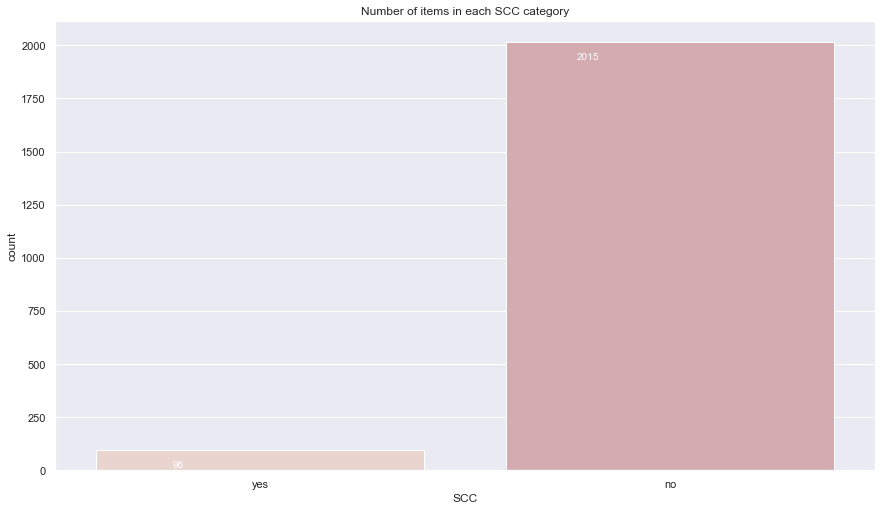

In [36]:
count_values(df,"SCC",["yes","no"])

Most of the people who took part in the survey did not record their daily calories intake

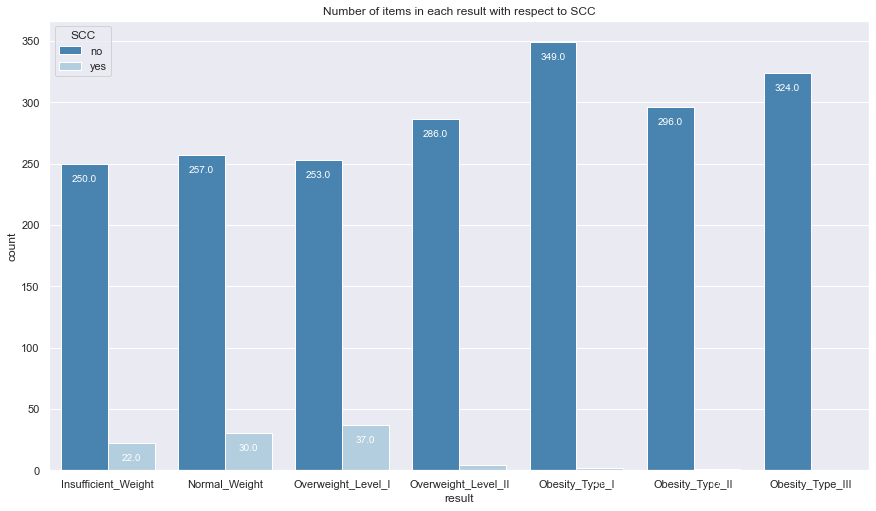

In [37]:
cross_plot(df, "result","SCC", weight_order,)

Majority of the people who recorded their daily calories intake were either insufficient weight or normal weight or overweight 
but the majority of those who did not measure their calories intake belong to overweight and obesity categories

#### Physical Activity

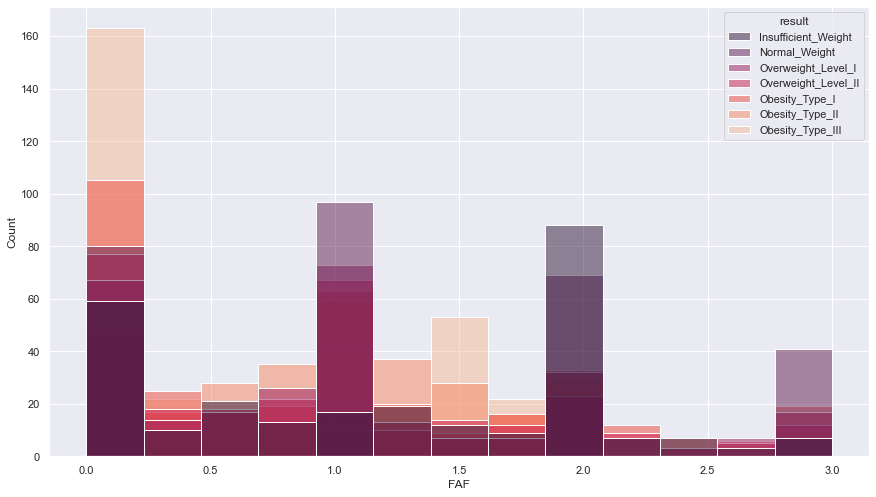

In [38]:
cmp_plot(df, "result", "FAF", weight_order)

People who do not do physical activity more than 2 days a week suffer from Obesity type-3, type-2 and type-1 

#### Use of technological devices

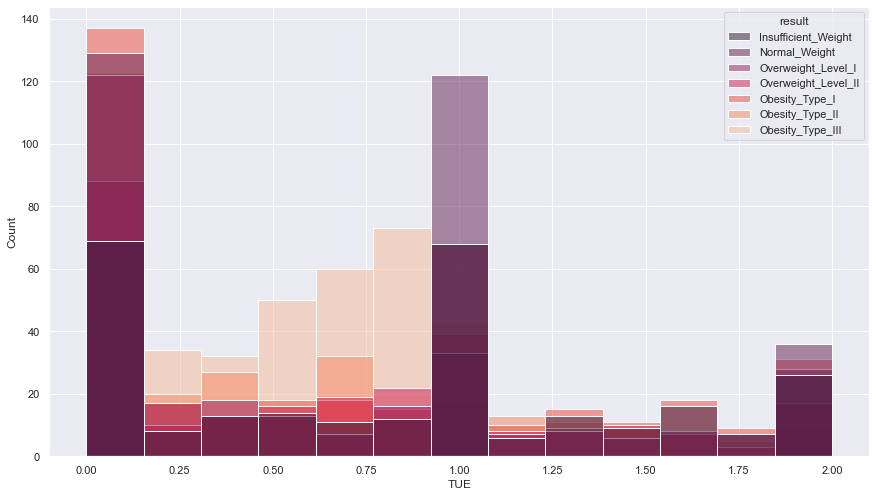

In [39]:
cmp_plot(df, "result", "TUE", weight_order)

The plot shows that most of the people suffering from obesity type 1 to 3 do not use technological device more than hour.

#### Alcohol Consumption

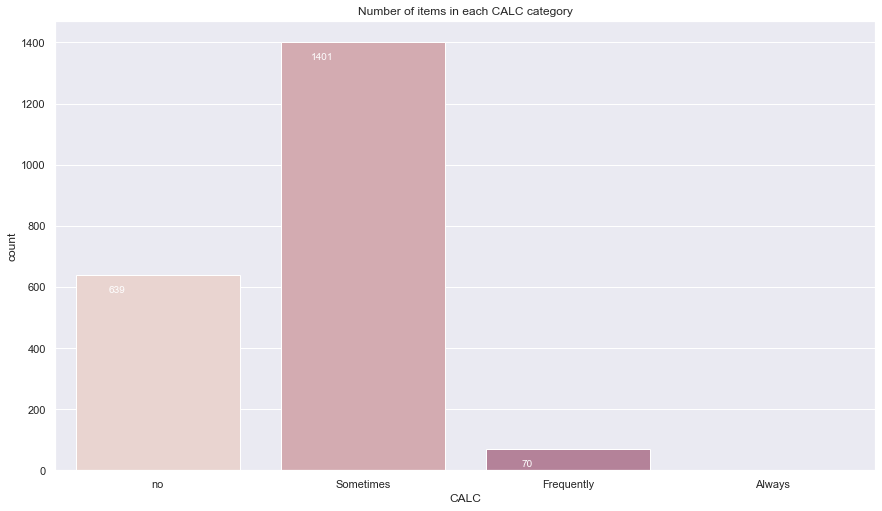

In [40]:
count_values(df, "CALC", ["no", "Sometimes", "Frequently", "Always"])

Most of the people who took part in survey either did not consume alcohol or consumed sometimes.

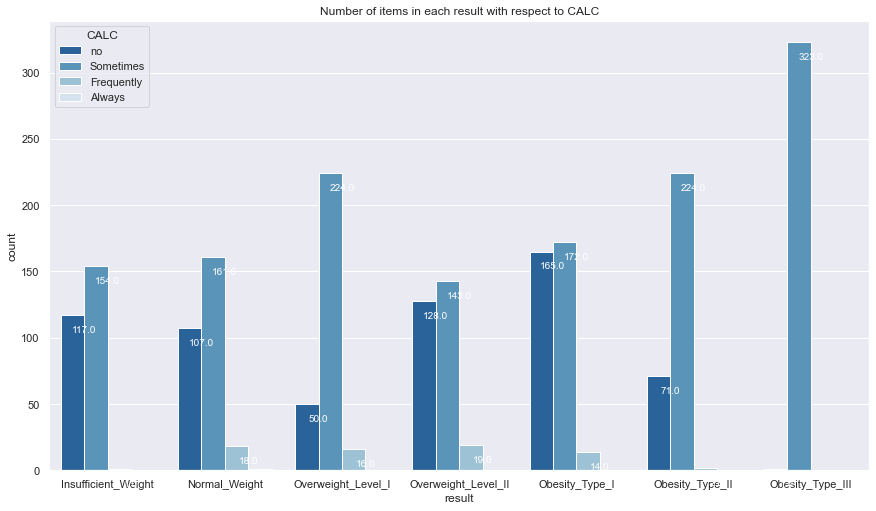

In [41]:
cross_plot(df, "result", "CALC", weight_order, hue_order= ["no", "Sometimes", "Frequently", "Always"])

Most of the people who consumed alcohol "sometimes" are suffering from obesity , specially from obesity type 3

#### Transportation

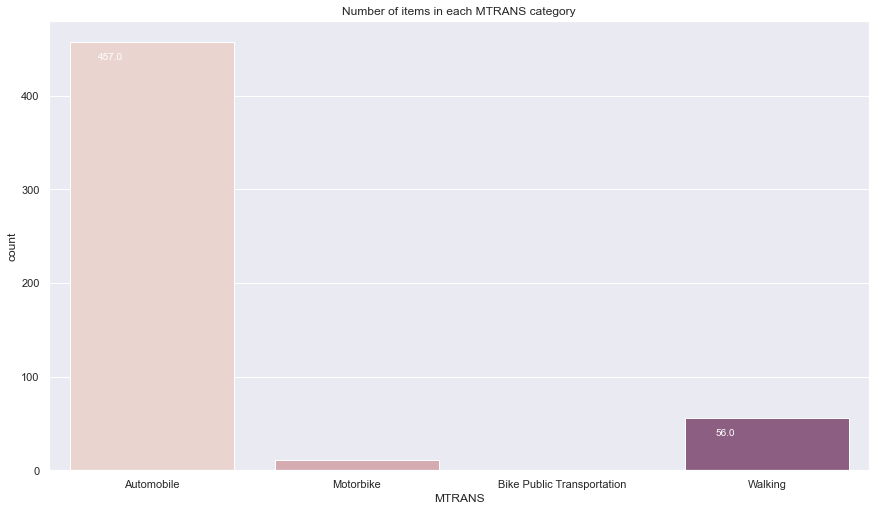

In [42]:
count_values(df, "MTRANS", ["Automobile","Motorbike","Bike Public Transportation","Walking"])

Most of the people who took part in the survey used automobile

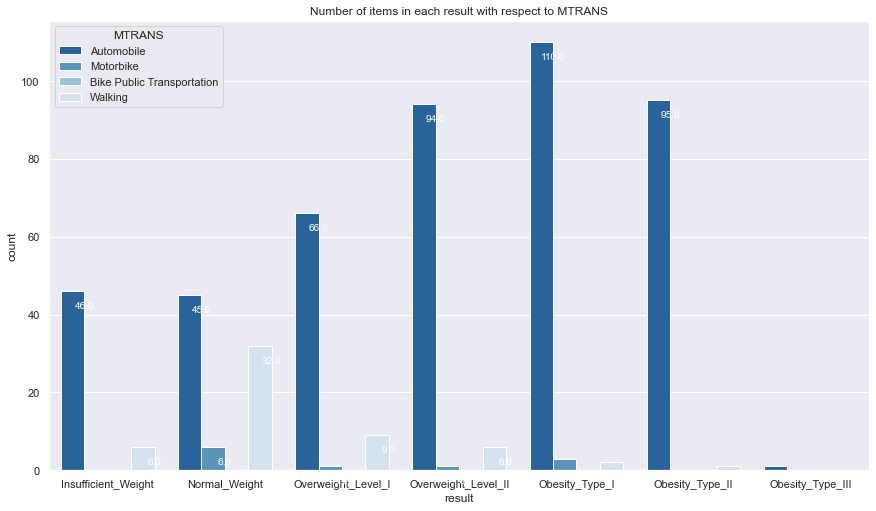

In [43]:
cross_plot(df, "result", "MTRANS", weight_order,["Automobile","Motorbike","Bike Public Transportation","Walking"] )

Majority of the people who prefer walking belong to insufficient to overweight category i.e. people who walk to commute from one place to another are not suffering from obesity

#### Correlation

<AxesSubplot:>

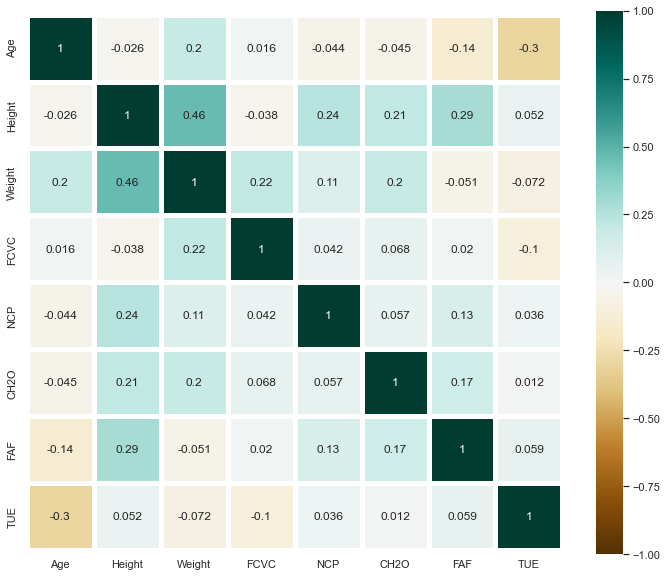

In [44]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(),annot=True,square=True,center=0,vmin=-1,vmax=1,
            cmap='BrBG',linewidths=5)

The PPS is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns. The score ranges from 0 (no predictive power) to 1 (perfect predictive power). It can be used as an alternative to the correlation (matrix).

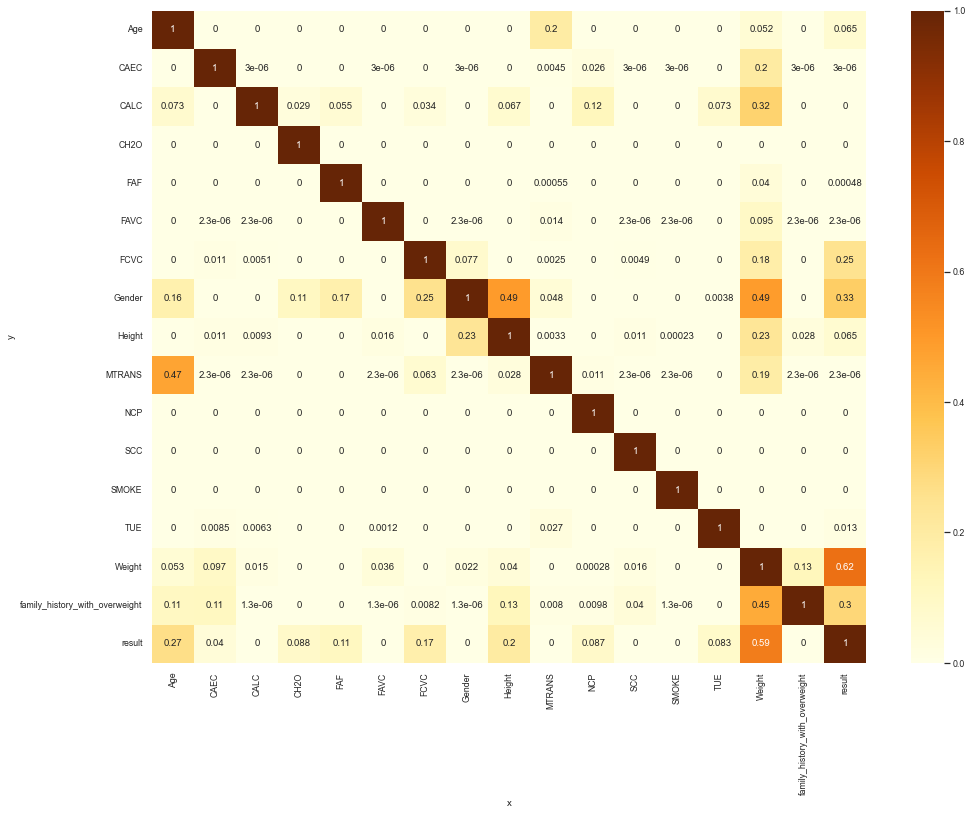

In [45]:
import ppscore as pps
import warnings
warnings.filterwarnings("ignore")


matrix_df = pps.matrix(df).pivot(columns='x', index='y',  values='ppscore')

sns.set(font_scale=0.8)
plt.figure(figsize=(16,12))
sns.heatmap(matrix_df, annot=True, cmap = sns.color_palette("YlOrBr", as_cmap=True))
plt.show()

## Data Preprocessing

* Data is limited so model will need to perform well with limited amount of data
* Model will need to handle dummy variables well and not be dependent on ratio data
* The ordinal variables may or may not be helful to the model
* The data is pretty wide but not very deep, so reducing the factors may be necessary


In [46]:
df_prep = df.copy()
ord_feature_list= ["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS", "result"]

#### Encode Labels

In [47]:
#encoding
from sklearn.preprocessing import OrdinalEncoder
df_ord=df_prep[ord_feature_list]

enc = OrdinalEncoder()
enc.fit(df_ord)
df_ord_arr=enc.transform(df_ord)

encoded_cat_df=pd.DataFrame(df_ord_arr, columns=ord_feature_list)
encoded_cat_df

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,result
0,0.0,1.0,0.0,2.0,0.0,0.0,3.0,3.0,1.0
1,0.0,1.0,0.0,2.0,1.0,1.0,2.0,3.0,1.0
2,1.0,1.0,0.0,2.0,0.0,0.0,1.0,3.0,1.0
3,1.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,5.0
4,1.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...
2106,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2107,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2108,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2109,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0


In [48]:
train_df_final = pd.concat( [df[df.columns.difference(ord_feature_list)] , encoded_cat_df ], axis= 1)

#### Train - Test split

In [49]:
# split df to X and Y
from sklearn.model_selection import train_test_split

y = train_df_final.loc[:, 'result'].values
X = train_df_final.drop('result', axis=1)

# split data into 80-20 for training set / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1688, 16), (423, 16), (1688,), (423,))

#### Normalize Data

In [50]:
#normalization(make all values bet. 0-1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized_arr=scaler.transform(X_train)
X_train_normalized_df=pd.DataFrame(X_train_normalized_arr, columns=X_train.columns.to_list())

X_test_normalized_arr=scaler.transform(X_test)
X_test_normalized_df=pd.DataFrame(X_test_normalized_arr, columns=X_test.columns.to_list())

In [51]:
X_train_normalized_df

,Age,CH2O,FAF,FCVC,Height,NCP,TUE,Weight,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,0.245550,0.206025,0.047985,1.000000,0.412658,0.666667,0.376538,0.539261,0.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75
1,0.191489,0.500000,0.333333,1.000000,0.377358,0.000000,1.000000,0.164021,0.0,0.0,0.0,0.666667,0.0,0.0,0.5,0.75
2,0.533806,0.502597,0.108438,0.851228,0.566038,0.666667,0.209528,0.656324,1.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.00
3,0.159611,0.675604,0.082277,1.000000,0.679002,0.666667,0.456680,0.929958,0.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75
4,0.190119,0.501785,0.419850,1.000000,0.532655,0.666667,0.208558,0.129869,0.0,1.0,1.0,0.333333,0.0,0.0,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,0.234043,0.500000,0.666667,0.500000,0.226415,0.000000,0.000000,0.131217,0.0,0.0,1.0,0.666667,0.0,0.0,0.5,0.75
1684,0.207358,0.500000,0.543971,0.268752,0.578815,0.666667,0.315711,0.642361,1.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75
1685,0.094117,0.693195,0.514877,1.000000,0.538606,0.666667,0.450033,0.720039,0.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75
1686,0.170139,0.328041,0.142590,1.000000,0.534458,0.921842,0.277983,0.097514,0.0,0.0,0.0,0.333333,0.0,0.0,0.5,0.75


In [52]:
X_test_normalized_df

,Age,CH2O,FAF,FCVC,Height,NCP,TUE,Weight,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,0.187546,0.500000,0.030781,0.500000,0.502432,0.666667,0.733248,0.300884,1.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75
1,0.122464,0.256018,0.101241,0.814396,0.174204,0.587628,0.001615,0.203847,0.0,0.0,1.0,0.666667,0.0,1.0,0.5,0.75
2,0.253601,0.011664,0.016977,1.000000,0.304645,0.666667,0.500000,0.517432,0.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75
3,0.136989,0.693995,0.283572,1.000000,0.671326,0.666667,0.328246,0.936148,0.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75
4,0.425532,1.000000,0.666667,0.500000,0.452830,0.666667,0.000000,0.369048,1.0,1.0,0.0,0.666667,0.0,0.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0.085106,0.500000,1.000000,0.500000,0.660377,0.666667,0.000000,0.270635,1.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.00
419,0.172086,0.548375,0.181521,0.674373,0.666287,0.666667,0.338440,0.552174,1.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75
420,0.124806,0.791082,0.666667,0.560093,0.585528,1.000000,0.755305,0.134257,1.0,1.0,1.0,0.666667,0.0,0.0,1.0,0.00
421,0.085106,0.500000,0.666667,0.000000,0.339623,0.666667,1.000000,0.196826,0.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75


In [53]:
#import necessary libraries
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import scikitplot as skplt

In [54]:
# cross-validation with 10 splits
cv = StratifiedShuffleSplit(n_splits=10, random_state = 42, test_size=0.2)

In [55]:
# display test scores and return result string and indexes of false samples
def display_test_scores(test, pred, prob):
    print("\n\n   TEST SCORES\n")
    print("===================================================================\n")
    
    #print accuracy
    accuracy = accuracy_score(test, pred)
    print("ACCURACY: {:.4f}\n".format(accuracy))
    print("\n")
    print("---------------------------------------------------\n")


    #print confusion matrix
    print ("CONFUSION MATRIX:\n")
    conf_mat = confusion_matrix(test, pred)
    cm_df = pd.DataFrame(conf_mat)
    
    #draw cm 
    
    sns.heatmap(cm_df, annot=True)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label',)
    plt.show()    
    print("\n")
    print("\n")
    print("---------------------------------------------------\n")
    
    #print FP, FN
    print("FALSE POSITIVES:\n")
    fp = conf_mat[1][0]
    pos_labels = conf_mat[1][0]+conf_mat[1][1]
    print("{} out of {} positive labels ({:.4f}%)\n".format(fp, pos_labels,fp/pos_labels))
    print("\n")
    print("---------------------------------------------------\n")

    print("FALSE NEGATIVES:\n")
    fn = conf_mat[0][1]
    neg_labels = conf_mat[0][1]+conf_mat[0][0]
    print("{} out of {} negative labels ({:.4f}%)\n".format(fn, neg_labels, fn/neg_labels))
    print("\n")
    print("--------------------------------------------------\n")
    
    #roc
    roc = roc_auc_score(test, prob, multi_class="ovr", average="macro")
    print("ROC-AUC score:({:.4f}%)\n".format(roc))
    print("\n")
    
    skplt.metrics.plot_roc(pred, prob)
    plt.show()
    
    print("--------------------------------------------------\n")
    

    #print classification report
    print("PRECISION, RECALL, F1 scores:\n\n")
    print("{}".format(classification_report(test, pred)))
    
    false_indexes = np.where(test != pred)
    return false_indexes

## Machine Learing 

### Classification

In [56]:
X_train= X_train_normalized_df
X_test= X_test_normalized_df

In [57]:
# 16/12/2022
# decesion tree
# Naive bayes
# SVM
# KNN
# Logistic Regression
# Random Forest

#### Decision Tree

The best parameters are {'class_weight': 'balanced', 'criterion': 'entropy'} with a score of 0.9470


   TEST SCORES


ACCURACY: 0.9385



---------------------------------------------------

CONFUSION MATRIX:



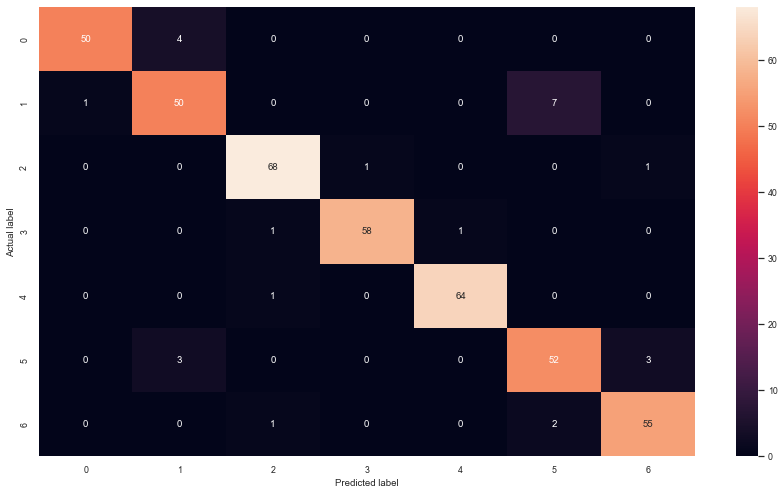





---------------------------------------------------

FALSE POSITIVES:

1 out of 51 positive labels (0.0196%)



---------------------------------------------------

FALSE NEGATIVES:

4 out of 54 negative labels (0.0741%)



--------------------------------------------------

ROC-AUC score:(0.9631%)





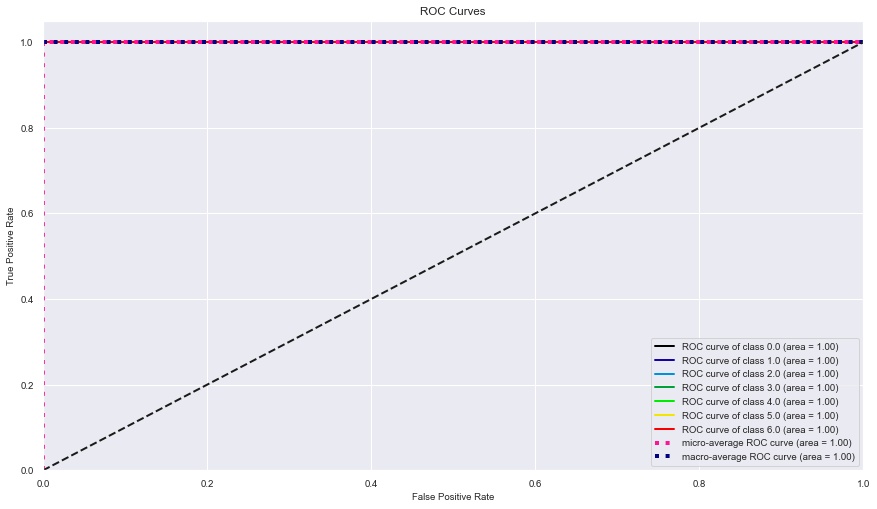

--------------------------------------------------

PRECISION, RECALL, F1 scores:


              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        54
         1.0       0.88      0.86      0.87        58
         2.0       0.96      0.97      0.96        70
         3.0       0.98      0.97      0.97        60
         4.0       0.98      0.98      0.98        65
         5.0       0.85      0.90      0.87        58
         6.0       0.93      0.95      0.94        58

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



(array([ 20,  49,  58,  69,  84,  91, 123, 140, 150, 152, 214, 216, 260,
        263, 264, 268, 279, 284, 289, 299, 306, 328, 362, 403, 405, 421],
       dtype=int64),)

In [58]:
#parameters
param_grid = {'criterion':['gini', 'entropy'],
              "class_weight": [None, "balanced"],
              }

#Decision Tree
grid_1 = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, verbose=False, n_jobs= -1, cv= cv)
grid_1.fit(X_train, y_train)

#print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_1.best_params_, grid_1.best_score_))

#prediction results
y_pred = grid_1.predict(X_test)
y_prob = grid_1.predict_proba(X_test)
display_test_scores(y_test, y_pred, y_prob)

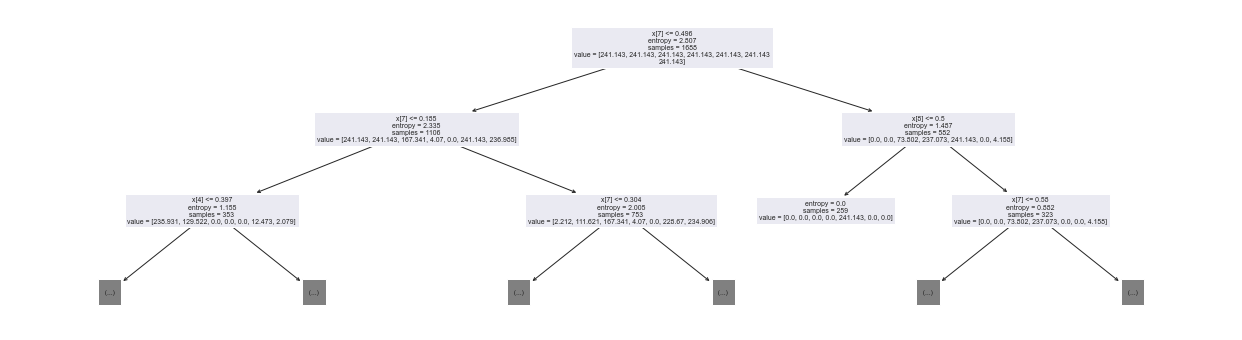

In [59]:
plt.figure(figsize = (22, 6))
plot_tree(grid_1.best_estimator_, max_depth= 2)
plt.show()

#### Naive-Bayes



----------- GaussianNB() --------------
The best parameters are {} with a score of 0.5754



   TEST SCORES


ACCURACY: 0.6194



---------------------------------------------------

CONFUSION MATRIX:



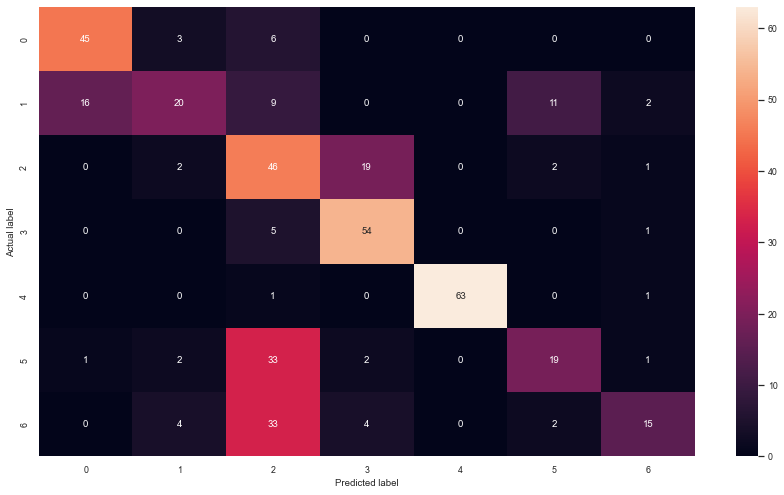





---------------------------------------------------

FALSE POSITIVES:

16 out of 36 positive labels (0.4444%)



---------------------------------------------------

FALSE NEGATIVES:

3 out of 48 negative labels (0.0625%)



--------------------------------------------------

ROC-AUC score:(0.9236%)





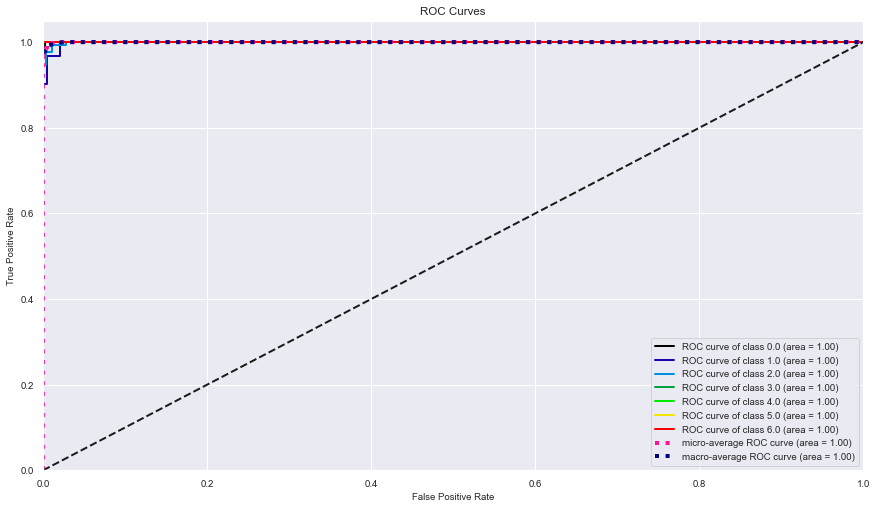

--------------------------------------------------

PRECISION, RECALL, F1 scores:


              precision    recall  f1-score   support

         0.0       0.73      0.83      0.78        54
         1.0       0.65      0.34      0.45        58
         2.0       0.35      0.66      0.45        70
         3.0       0.68      0.90      0.78        60
         4.0       1.00      0.97      0.98        65
         5.0       0.56      0.33      0.41        58
         6.0       0.71      0.26      0.38        58

    accuracy                           0.62       423
   macro avg       0.67      0.61      0.60       423
weighted avg       0.66      0.62      0.61       423



----------- MultinomialNB() --------------
The best parameters are {} with a score of 0.4071



   TEST SCORES


ACCURACY: 0.4113



---------------------------------------------------

CONFUSION MATRIX:



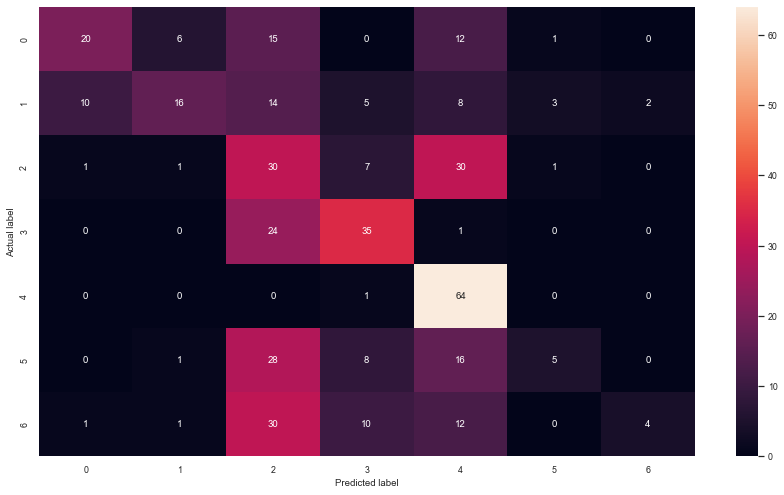





---------------------------------------------------

FALSE POSITIVES:

10 out of 26 positive labels (0.3846%)



---------------------------------------------------

FALSE NEGATIVES:

6 out of 26 negative labels (0.2308%)



--------------------------------------------------

ROC-AUC score:(0.8253%)





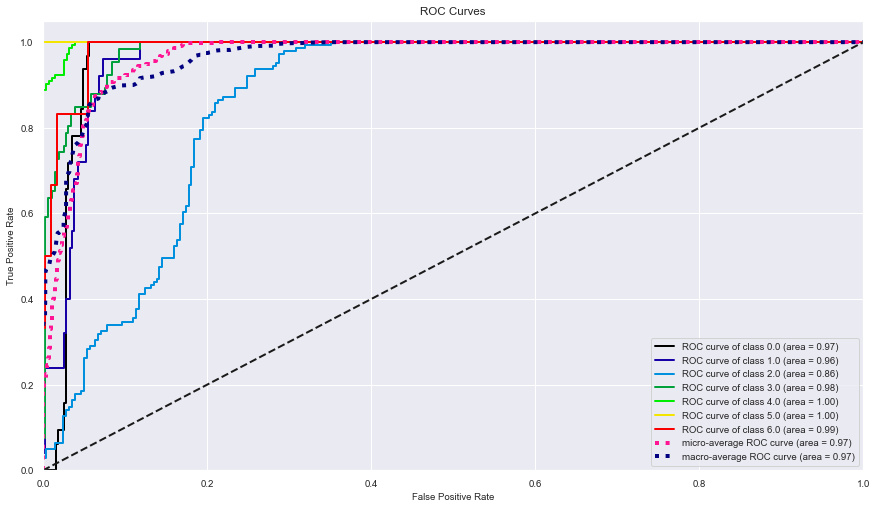

--------------------------------------------------

PRECISION, RECALL, F1 scores:


              precision    recall  f1-score   support

         0.0       0.62      0.37      0.47        54
         1.0       0.64      0.28      0.39        58
         2.0       0.21      0.43      0.28        70
         3.0       0.53      0.58      0.56        60
         4.0       0.45      0.98      0.62        65
         5.0       0.50      0.09      0.15        58
         6.0       0.67      0.07      0.12        58

    accuracy                           0.41       423
   macro avg       0.52      0.40      0.37       423
weighted avg       0.51      0.41      0.37       423



----------- ComplementNB() --------------
The best parameters are {} with a score of 0.3899



   TEST SCORES


ACCURACY: 0.3901



---------------------------------------------------

CONFUSION MATRIX:



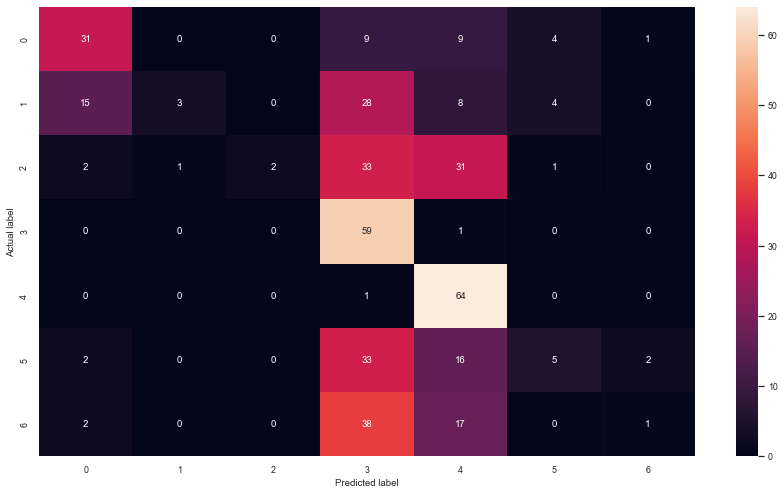





---------------------------------------------------

FALSE POSITIVES:

15 out of 18 positive labels (0.8333%)



---------------------------------------------------

FALSE NEGATIVES:

0 out of 31 negative labels (0.0000%)



--------------------------------------------------

ROC-AUC score:(0.8287%)





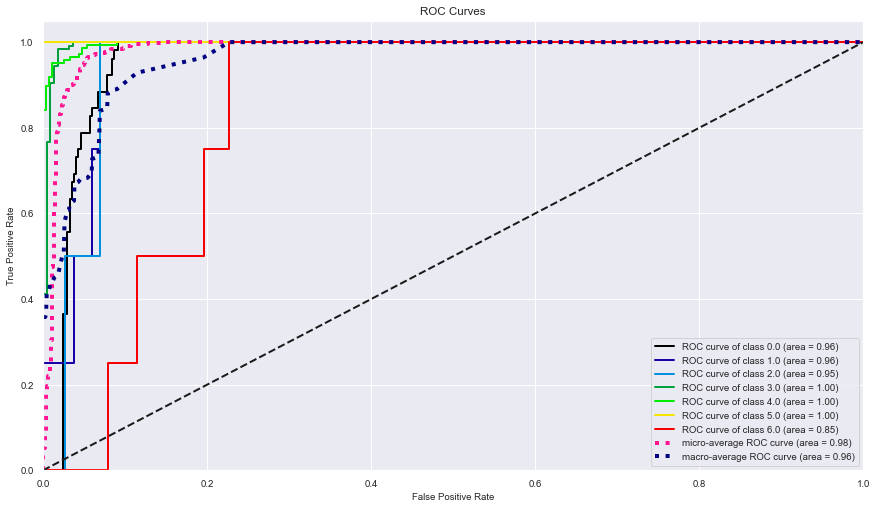

--------------------------------------------------

PRECISION, RECALL, F1 scores:


              precision    recall  f1-score   support

         0.0       0.60      0.57      0.58        54
         1.0       0.75      0.05      0.10        58
         2.0       1.00      0.03      0.06        70
         3.0       0.29      0.98      0.45        60
         4.0       0.44      0.98      0.61        65
         5.0       0.36      0.09      0.14        58
         6.0       0.25      0.02      0.03        58

    accuracy                           0.39       423
   macro avg       0.53      0.39      0.28       423
weighted avg       0.54      0.39      0.28       423



In [60]:
# Naive-Bayes with different approaches
nb_list = [ GaussianNB(), MultinomialNB(), ComplementNB()]

for nb in nb_list:
    print("\n\n-----------", str(nb), "--------------")
    
    # parameters 
    parameters = {}

    # grid search for parameters
    grid_2 = GridSearchCV(estimator=nb, param_grid=parameters, cv=cv, n_jobs=-1)
    grid_2.fit(X_train, y_train)

    # print best scores
    print("The best parameters are %s with a score of %0.4f\n"
          % (grid_2.best_params_, grid_2.best_score_))

    # prediction results
    y_pred = grid_2.predict(X_test)
    y_prob = grid_2.predict_proba(X_test)

    # print accuracy metrics
    display_test_scores(y_test, y_pred, y_prob)
    

#### Support Vector Machine

The best parameters are {'C': 100, 'kernel': 'linear'} with a score of 0.9583



   TEST SCORES


ACCURACY: 0.9716



---------------------------------------------------

CONFUSION MATRIX:



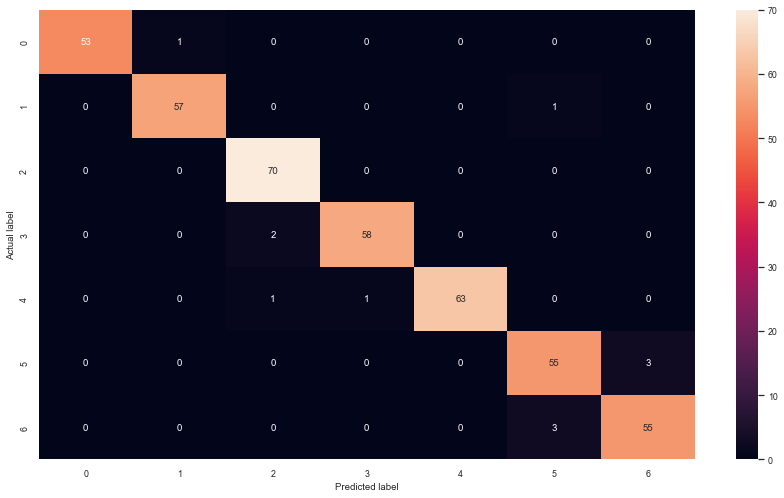





---------------------------------------------------

FALSE POSITIVES:

0 out of 57 positive labels (0.0000%)



---------------------------------------------------

FALSE NEGATIVES:

1 out of 54 negative labels (0.0185%)



--------------------------------------------------

ROC-AUC score:(0.9981%)





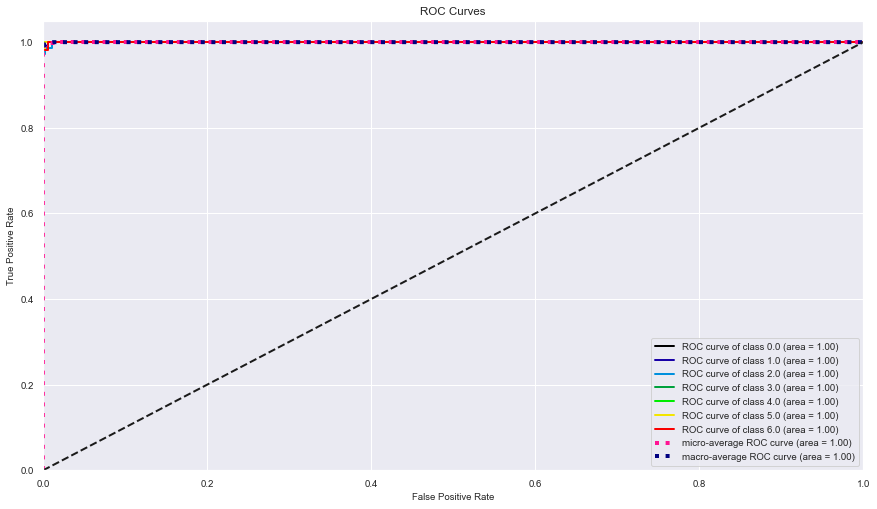

--------------------------------------------------

PRECISION, RECALL, F1 scores:


              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        54
         1.0       0.98      0.98      0.98        58
         2.0       0.96      1.00      0.98        70
         3.0       0.98      0.97      0.97        60
         4.0       1.00      0.97      0.98        65
         5.0       0.93      0.95      0.94        58
         6.0       0.95      0.95      0.95        58

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



(array([ 21,  59,  69,  84, 123, 144, 309, 320, 328, 337, 364, 403],
       dtype=int64),)

In [61]:
# SVM classifier
svm = SVC(tol=1e-5, random_state=0, probability=True)

# parameters 
parameters = {
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [0.01, 0.1, 1, 10, 100],
            }

# grid search for parameters
grid_3 = GridSearchCV(estimator=svm, param_grid=parameters, cv=cv, n_jobs=-1)
grid_3.fit(X_train, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_3.best_params_, grid_3.best_score_))

# prediction results
y_pred = grid_3.predict(X_test)
y_prob = grid_3.predict_proba(X_test)

# print accuracy metrics
display_test_scores(y_test, y_pred, y_prob)

#### K-Nearest Neaighbours

The best parameters are {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1} with a score of 0.8420



   TEST SCORES


ACCURACY: 0.8322



---------------------------------------------------

CONFUSION MATRIX:



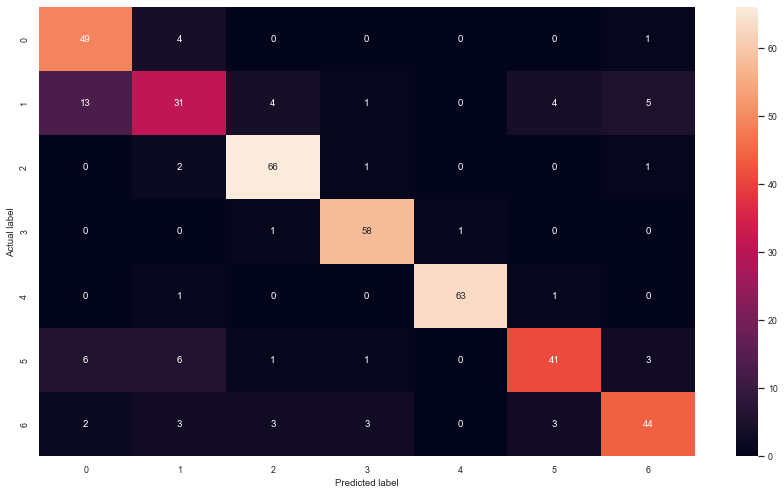





---------------------------------------------------

FALSE POSITIVES:

13 out of 44 positive labels (0.2955%)



---------------------------------------------------

FALSE NEGATIVES:

4 out of 53 negative labels (0.0755%)



--------------------------------------------------

ROC-AUC score:(0.9478%)





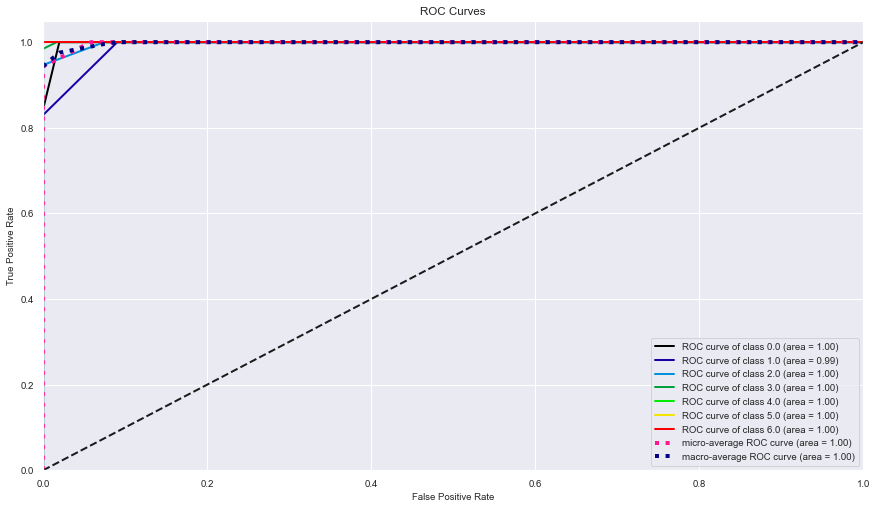

--------------------------------------------------

PRECISION, RECALL, F1 scores:


              precision    recall  f1-score   support

         0.0       0.70      0.91      0.79        54
         1.0       0.66      0.53      0.59        58
         2.0       0.88      0.94      0.91        70
         3.0       0.91      0.97      0.94        60
         4.0       0.98      0.97      0.98        65
         5.0       0.84      0.71      0.77        58
         6.0       0.81      0.76      0.79        58

    accuracy                           0.83       423
   macro avg       0.83      0.83      0.82       423
weighted avg       0.83      0.83      0.83       423



(array([  0,  10,  20,  23,  25,  32,  33,  40,  49,  55,  56,  57,  63,
         65,  69,  75,  82,  84,  89,  91,  98, 103, 107, 109, 113, 122,
        123, 125, 126, 128, 152, 173, 183, 184, 186, 189, 193, 209, 214,
        223, 232, 244, 251, 264, 270, 279, 286, 292, 295, 304, 306, 309,
        315, 320, 328, 330, 335, 351, 354, 364, 366, 370, 372, 383, 384,
        393, 399, 409, 418, 421, 422], dtype=int64),)

In [62]:
knn = KNeighborsClassifier()
# parameters 
parameters = {
                "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
                "n_neighbors": list(range(0, 25)),
                "metric": ['euclidean', 'manhattan', 'chebyshev'],
                "p": [1,2],
    }

# grid search for parameters
grid_4 = GridSearchCV(estimator=knn, param_grid=parameters, cv=cv, n_jobs=-1)
grid_4.fit(X_train, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_4.best_params_, grid_4.best_score_))

# prediction results
y_pred = grid_4.predict(X_test)
y_prob = grid_4.predict_proba(X_test)

# print accuracy metrics
display_test_scores(y_test, y_pred, y_prob)

#### Logitic Regression

The best parameters are {'C': 100, 'max_iter': 250, 'penalty': 'l2'} with a score of 0.9151



   TEST SCORES


ACCURACY: 0.9314



---------------------------------------------------

CONFUSION MATRIX:



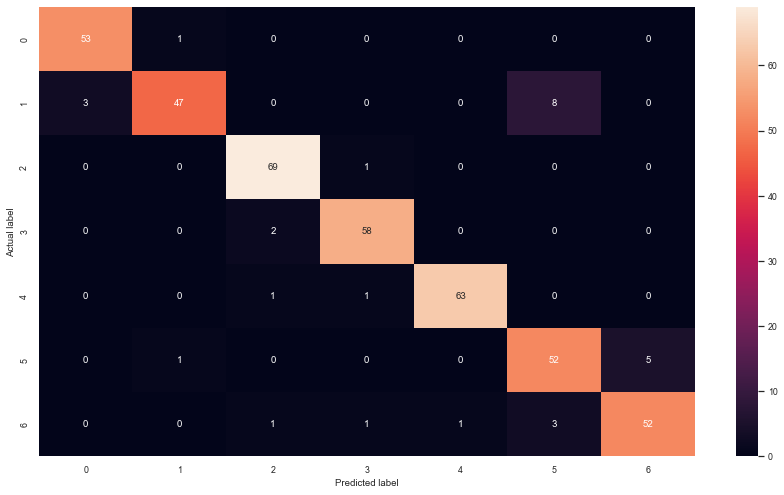





---------------------------------------------------

FALSE POSITIVES:

3 out of 50 positive labels (0.0600%)



---------------------------------------------------

FALSE NEGATIVES:

1 out of 54 negative labels (0.0185%)



--------------------------------------------------

ROC-AUC score:(0.9931%)





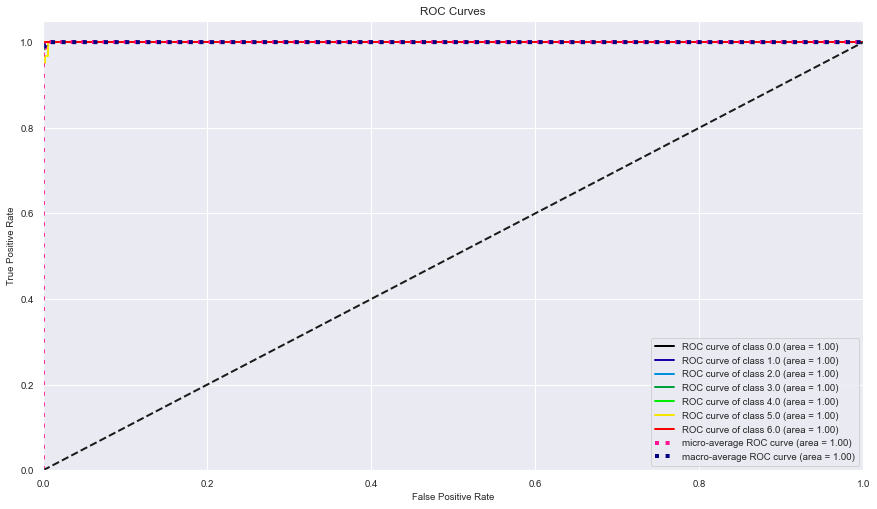

--------------------------------------------------

PRECISION, RECALL, F1 scores:


              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        54
         1.0       0.96      0.81      0.88        58
         2.0       0.95      0.99      0.97        70
         3.0       0.95      0.97      0.96        60
         4.0       0.98      0.97      0.98        65
         5.0       0.83      0.90      0.86        58
         6.0       0.91      0.90      0.90        58

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423



(array([ 21,  22,  23,  37,  55,  57,  59,  69,  84, 120, 123, 128, 133,
        140, 144, 169, 209, 212, 231, 263, 279, 286, 309, 320, 328, 340,
        354, 364, 421], dtype=int64),)

In [63]:
logit = LogisticRegression(solver='lbfgs', random_state=0)
# parameters 
parameters = {
                "penalty":['l1', 'l2'],
                "C": [0.01, 0.1, 1, 10, 100],
                "max_iter": [250],
                "penalty":["l1","l2"]
             }

# grid search for parameters
grid_5 = GridSearchCV(estimator=logit, param_grid=parameters, cv=cv, n_jobs=-1)
grid_5.fit(X_train, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_5.best_params_, grid_5.best_score_))

# prediction results
y_pred = grid_5.predict(X_test)
y_prob = grid_5.predict_proba(X_test)

# print accuracy metrics
display_test_scores(y_test, y_pred, y_prob)


The best parameters are {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': None, 'max_samples': None, 'n_estimators': 200} with a score of 0.9624


   TEST SCORES


ACCURACY: 0.9504



---------------------------------------------------

CONFUSION MATRIX:



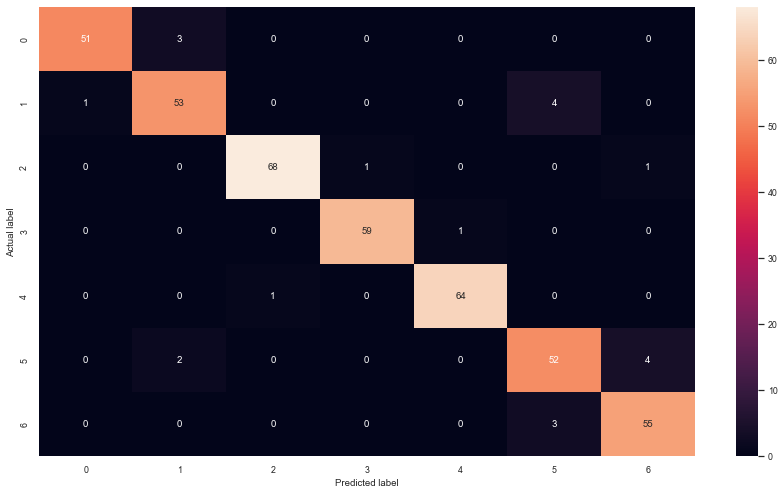





---------------------------------------------------

FALSE POSITIVES:

1 out of 54 positive labels (0.0185%)



---------------------------------------------------

FALSE NEGATIVES:

3 out of 54 negative labels (0.0556%)



--------------------------------------------------

ROC-AUC score:(0.9961%)





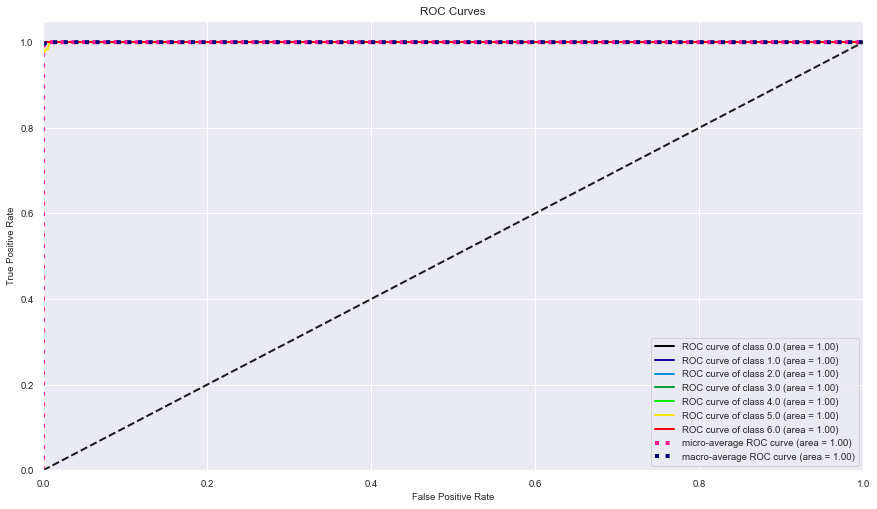

--------------------------------------------------

PRECISION, RECALL, F1 scores:


              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        54
         1.0       0.91      0.91      0.91        58
         2.0       0.99      0.97      0.98        70
         3.0       0.98      0.98      0.98        60
         4.0       0.98      0.98      0.98        65
         5.0       0.88      0.90      0.89        58
         6.0       0.92      0.95      0.93        58

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



(array([ 49,  69,  84,  91, 123, 140, 164, 214, 263, 264, 268, 279, 284,
        289, 306, 328, 345, 360, 362, 403, 421], dtype=int64),)

In [65]:
rf = RandomForestClassifier(random_state=0)

# parameters 
parameters = {
                "bootstrap": [True,False],
                "max_features": [None, "sqrt", "log2"],
                "class_weight": [None, "balanced", "balanced_subsample"],
                "max_samples": [None, 0.3, 0.5, 0.7, 0.9],
                "n_estimators": [10, 100, 200],
                'criterion':['gini','entropy'],
                
}

# grid search for parameters
grid_6 = GridSearchCV(estimator=rf, param_grid=parameters, cv=cv, n_jobs=-1)
grid_6.fit(X_train, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_6.best_params_, grid_6.best_score_))

# prediction results
y_pred = grid_6.predict(X_test)
y_prob = grid_6.predict_proba(X_test)

# print accuracy metrics
display_test_scores(y_test, y_pred, y_prob)

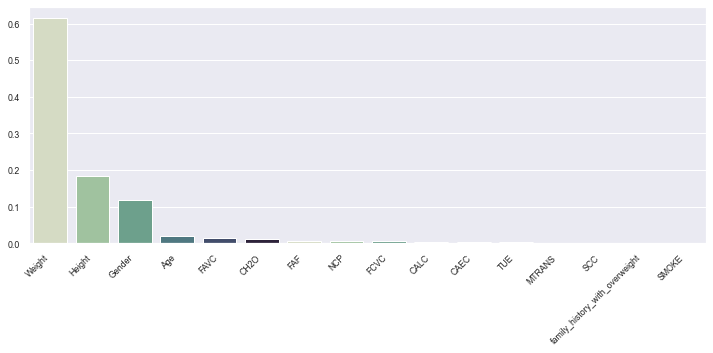

In [66]:
feature_imp = pd.Series(grid_6.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(10, 5))

# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp, palette=sns.cubehelix_palette(start=.5, rot=-.75,))

# Add labels to your graph
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd

data = {'Accuracy': [0.9385,0.6194,0.9716,0.8322,0.9362,0.9504],
        'ROC_AUC': [0.9631, 0.9236, 0.9981, 0.9478, 0.9930,0.9961],
        'Precision':[0.94,0.66,0.97,0.83,0.94,0.95],
        'Recall':[0.94,0.62,0.97,0.83,0.94,0.95],
        'F1-Score':[0.94,0.61,0.97,0.83,0.94,0.95]};
        
        

df = pd.DataFrame(data, index=['Decision Tree', 'Naive Bayes(Gaussian)', 'SVM', 'k-Nearest Neighbour', 'Logitic Regression','Random Forest classifier'])

print(df)

                          Accuracy  ROC_AUC  Precision  Recall  F1-Score
Decision Tree               0.9385   0.9631       0.94    0.94      0.94
Naive Bayes(Gaussian)       0.6194   0.9236       0.66    0.62      0.61
SVM                         0.9716   0.9981       0.97    0.97      0.97
k-Nearest Neighbour         0.8322   0.9478       0.83    0.83      0.83
Logitic Regression          0.9362   0.9930       0.94    0.94      0.94
Random Forest classifier    0.9504   0.9961       0.95    0.95      0.95
